# Cohort Analysis for Ironhack Payments

## 1. Introduction

### Business Context:
IronHack Payments offers innovative cash advance solutions since 2020. This project aims to perform a cohort analysis to understand user behavior and the performance of their financial services.

### Deliverables:
- Python Code (Jupyter Notebook)
- Exploratory Data Analysis Report
- Data Quality Analysis Report
- Short Presentation

In [445]:
import pandas as pd

data_cash = pd.read_csv('./datasets/cash_data_analyst.csv')
data_fees = pd.read_csv('./datasets/fees_data_analyst.csv')
lexicon_data = pd.read_excel('./datasets/Lexique_Data_Analyst.xlsx')

dff = data_fees.copy()

dfc = data_cash.copy()

print(data_cash_request.head(5))

print(data_fees.head(5))


     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

## 2. Data Loading
- Extracting and briefly describing each dataset and its columns.

In [447]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [448]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [449]:
dff.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


In [450]:
dfc.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [451]:
dff.shape

(21061, 13)

In [452]:
dfc.shape

(23970, 16)

In [453]:
n_rows = dff.shape[0]
n_columns = dff.shape[1]

In [454]:
dff.head(3)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after


In [455]:
n_rows = dfc.shape[0]
n_columns = dfc.shape[1]

In [456]:
dfc.head(3)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


**Similarities: id, status, created at, updated at**

In [458]:
dff.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [459]:
dfc.columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')

## 3. Data Quality Analysis
- Checking for missing values.
- Identifying duplicates and inconsistencies.
- Validate data types.



**Checking for missing values and deleting columns**

In [462]:
dff.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [463]:
dff = dff.dropna(subset=['cash_request_id'])
dff.isnull().sum()

id                     0
cash_request_id        0
type                   0
status                 0
category           18861
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5526
from_date          13291
to_date            13291
charge_moment          0
dtype: int64

In [464]:
dfc.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [465]:
dfc = dfc.dropna(subset=['user_id'])
dfc.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                           0
moderated_at                   7758
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     6276
money_back_date                6026
transfer_type                     0
send_at                        6325
recovery_status               18727
reco_creation                 18727
reco_last_update              18727
dtype: int64

In [466]:
dff.shape

(21057, 13)

In [467]:
dfc.shape

(21867, 16)

In [468]:
dff = data_fees.copy()

dfc = data_cash.copy()

**Here Im checking the percentage of column Category. Since 72% of this data is "rejected_direct_debit", I think is safe to fill the empty values**

In [470]:
percentages = dff['category'].value_counts(normalize=True) * 100

print(percentages)

category
rejected_direct_debit     72.814208
month_delay_on_payment    27.185792
Name: proportion, dtype: float64


In [471]:
dff['category'] = dff['category'].fillna('rejected_direct_debit')

print(dff['category'].isnull().sum())

0


**Here Im keeping the most important columns**

In [473]:
important_columns = [
    'id', 
    'cash_request_id', 
    'type', 
    'category',
    'status', 
    'total_amount', 
    'created_at', 
    ]

In [474]:
dff_filtered = dff[important_columns]
dff_filtered

,id,cash_request_id,type,category,status,total_amount,created_at
0,6537,14941.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-09-07 10:47:27.42315+00
1,6961,11714.0,incident,rejected_direct_debit,accepted,5.0,2020-09-09 20:51:17.998653+00
2,16296,23371.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-23 10:10:58.352972+00
3,20775,26772.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-31 15:46:53.643958+00
4,11242,19350.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-06 08:20:17.170432+00
...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-10 06:42:22.822743+00
21057,20768,26764.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-31 15:24:18.680694+00
21058,18779,25331.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-27 17:28:51.749177+00
21059,16542,23628.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-23 16:27:52.047457+00


In [475]:
important_columns2 = [
     'id', 'amount', 'status', 'created_at', 'user_id']
dfc_filtered = dfc[important_columns2]
dfc_filtered

,id,amount,status,created_at,user_id
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,804.0
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,231.0
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,191.0
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,761.0
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,7686.0
...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,13681.0
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,NaN
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,82122.0
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,64517.0


## 4. Checking for Id`s


**Checking for duplicates**

In [478]:
print("Duplicates in dff_filtered:")
print("Duplicate 'cash_request_id':", dff_filtered['cash_request_id'].duplicated().sum())
print("Duplicate 'id':", dff_filtered['id'].duplicated().sum())

print("Duplicates in dfc_filtered:")
print("Duplicate 'user_id':", dfc_filtered['user_id'].duplicated().sum())
print("Duplicate 'id':", dfc_filtered['id'].duplicated().sum())

Duplicates in dff_filtered:
Duplicate 'cash_request_id': 8127
Duplicate 'id': 0
Duplicates in dfc_filtered:
Duplicate 'user_id': 13171
Duplicate 'id': 0


In [479]:
print("Columns in dff_filtered:", dff_filtered.columns)
print("Columns in dfc_filtered:", dfc_filtered.columns)

# common columns
common_columns = set(dff_filtered.columns).intersection(dfc_filtered.columns)
print("Common columns between the datasets:", common_columns)

Columns in dff_filtered: Index(['id', 'cash_request_id', 'type', 'category', 'status', 'total_amount',
       'created_at'],
      dtype='object')
Columns in dfc_filtered: Index(['id', 'amount', 'status', 'created_at', 'user_id'], dtype='object')
Common columns between the datasets: {'created_at', 'id', 'status'}


**Merging IDs**

In [481]:
# Merge 'id'
merged_df = pd.merge(dff_filtered, dfc_filtered, on='id', how='inner')

In [482]:
merged_df

,id,cash_request_id,type,category,status_x,total_amount,created_at_x,amount,status_y,created_at_y,user_id
0,6537,14941.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-09-07 10:47:27.42315+00,100.0,money_back,2020-07-04 05:59:49.246265+00,26978.0
1,6961,11714.0,incident,rejected_direct_debit,accepted,5.0,2020-09-09 20:51:17.998653+00,100.0,money_back,2020-07-07 17:45:03.352406+00,13539.0
2,16296,23371.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-23 10:10:58.352972+00,50.0,money_back,2020-09-15 19:05:39.267562+00,13756.0
3,20775,26772.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-31 15:46:53.643958+00,100.0,money_back,2020-10-13 08:15:07.74666+00,61460.0
4,11242,19350.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-06 08:20:17.170432+00,50.0,money_back,2020-08-06 22:46:50.681779+00,31188.0
...,...,...,...,...,...,...,...,...,...,...,...
18428,12372,20262.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-10 06:42:22.822743+00,50.0,rejected,2020-08-13 15:21:44.956497+00,NaN
18429,20768,26764.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-31 15:24:18.680694+00,50.0,money_back,2020-10-13 07:46:38.698727+00,33520.0
18430,18779,25331.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-27 17:28:51.749177+00,50.0,rejected,2020-10-01 18:51:01.003129+00,55943.0
18431,16542,23628.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-23 16:27:52.047457+00,50.0,money_back,2020-09-17 07:33:06.068449+00,19040.0


**Chercking for duplicates in merged**

In [484]:
print("Duplicates in merged_df['id']:", merged_df['id'].duplicated().sum())

Duplicates in merged_df['id']: 0


In [485]:
print("Missing values in merged_df:")
print(merged_df.isnull().sum())

Missing values in merged_df:
id                    0
cash_request_id       2
type                  0
category              0
status_x              0
total_amount          0
created_at_x          0
amount                0
status_y              0
created_at_y          0
user_id            1973
dtype: int64


In [486]:
merged_df = merged_df.dropna(subset=['cash_request_id'])
merged_df = merged_df.dropna(subset=['user_id'])

**Droping rows with missing cash request**

In [488]:
#droping rows with missing cash_request_id
merged_df = merged_df.dropna(subset=['cash_request_id'])

#droping rows with missing user_id
merged_df = merged_df.dropna(subset=['user_id'])


print("Shape after cleaning:", merged_df.shape)
print("Missing values after cleaning:")
print(merged_df.isnull().sum())

Shape after cleaning: (16458, 11)
Missing values after cleaning:
id                 0
cash_request_id    0
type               0
category           0
status_x           0
total_amount       0
created_at_x       0
amount             0
status_y           0
created_at_y       0
user_id            0
dtype: int64


**Finally, MERGED**

In [490]:
merged_df

,id,cash_request_id,type,category,status_x,total_amount,created_at_x,amount,status_y,created_at_y,user_id
0,6537,14941.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-09-07 10:47:27.42315+00,100.0,money_back,2020-07-04 05:59:49.246265+00,26978.0
1,6961,11714.0,incident,rejected_direct_debit,accepted,5.0,2020-09-09 20:51:17.998653+00,100.0,money_back,2020-07-07 17:45:03.352406+00,13539.0
2,16296,23371.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-23 10:10:58.352972+00,50.0,money_back,2020-09-15 19:05:39.267562+00,13756.0
3,20775,26772.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-31 15:46:53.643958+00,100.0,money_back,2020-10-13 08:15:07.74666+00,61460.0
4,11242,19350.0,instant_payment,rejected_direct_debit,accepted,5.0,2020-10-06 08:20:17.170432+00,50.0,money_back,2020-08-06 22:46:50.681779+00,31188.0
...,...,...,...,...,...,...,...,...,...,...,...
18427,14707,22050.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-19 06:48:13.655092+00,100.0,money_back,2020-09-05 13:27:19.805671+00,12229.0
18429,20768,26764.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-31 15:24:18.680694+00,50.0,money_back,2020-10-13 07:46:38.698727+00,33520.0
18430,18779,25331.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-27 17:28:51.749177+00,50.0,rejected,2020-10-01 18:51:01.003129+00,55943.0
18431,16542,23628.0,instant_payment,rejected_direct_debit,rejected,5.0,2020-10-23 16:27:52.047457+00,50.0,money_back,2020-09-17 07:33:06.068449+00,19040.0


In [491]:
print(merged_df['created_at_x'].dtype)

object


**Converting to datetime**

In [493]:
merged_df['created_at_x'] = pd.to_datetime(merged_df['created_at_x'], errors='coerce')

print(merged_df['created_at_x'].head())

0   2020-09-07 10:47:27.423150+00:00
1   2020-09-09 20:51:17.998653+00:00
2   2020-10-23 10:10:58.352972+00:00
3   2020-10-31 15:46:53.643958+00:00
4   2020-10-06 08:20:17.170432+00:00
Name: created_at_x, dtype: datetime64[ns, UTC]


In [494]:
merged_df['created_at_x'] = merged_df['created_at_x'].dt.to_period('M')

print(merged_df['created_at_x'].head())

0    2020-09
1    2020-09
2    2020-10
3    2020-10
4    2020-10
Name: created_at_x, dtype: period[M]


/var/folders/cj/_ljqqgzj7bvdlj6sc0_8wd080000gn/T/ipykernel_78745/3021134120.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['created_at_x'] = merged_df['created_at_x'].dt.to_period('M')


**Define cohort as the first interaction month for each user**

In [496]:
merged_df['cohort'] = merged_df.groupby('user_id')['created_at_x'].transform('min')

print("Cohorts created for each user:")
print(merged_df[['user_id', 'created_at_x', 'cohort']].head())

Cohorts created for each user:
   user_id created_at_x   cohort
0  26978.0      2020-09  2020-09
1  13539.0      2020-09  2020-08
2  13756.0      2020-10  2020-09
3  61460.0      2020-10  2020-10
4  31188.0      2020-10  2020-09


**Define cohort as the first interaction month for each user**

In [498]:
merged_df['cohort'] = merged_df.groupby('user_id')['created_at_x'].transform('min')

print(merged_df[['user_id', 'created_at_x', 'cohort']].head())

   user_id created_at_x   cohort
0  26978.0      2020-09  2020-09
1  13539.0      2020-09  2020-08
2  13756.0      2020-10  2020-09
3  61460.0      2020-10  2020-10
4  31188.0      2020-10  2020-09


**Group by cohort and count transactions**

In [500]:
transactions_per_cohort = merged_df.groupby('cohort').size()

print("Number of transactions per cohort:")
print(transactions_per_cohort)

Number of transactions per cohort:
cohort
2020-05      12
2020-06    1609
2020-07    2594
2020-08    3673
2020-09    3782
2020-10    4667
2020-11     121
Freq: M, dtype: int64


**Group by cohort and sum revenue**


In [502]:
revenue_per_cohort = merged_df.groupby('cohort')['amount'].sum()

print("Revenue per cohort:")
print(revenue_per_cohort)

Revenue per cohort:
cohort
2020-05      1189.0
2020-06    152967.0
2020-07    242199.0
2020-08    336599.0
2020-09    330237.0
2020-10    365981.0
2020-11     10440.0
Freq: M, Name: amount, dtype: float64


**Displaying results**

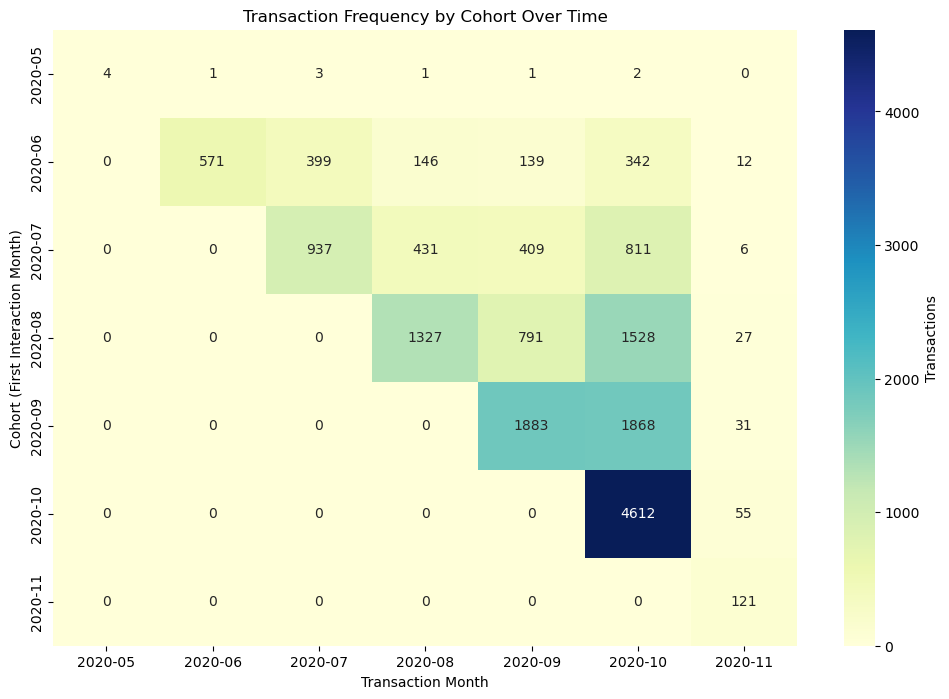

In [504]:
import seaborn as sns
import matplotlib.pyplot as plt

merged_df['transaction_month'] = merged_df['created_at_x']  # Ensure it's using the month-year format
cohort_data = merged_df.groupby(['cohort', 'transaction_month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Transactions'})
plt.title('Transaction Frequency by Cohort Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Cohort (First Interaction Month)')
plt.show()

**Distribution: The values in the heatmap show a gradual decrease in transaction frequency over time, showing a right-skewed distribution. This means that most transactions occur in the initial months, with fewer transactions in later months.
The transactional behavior across cohorts is positively skewed since the majority of the activity happens early.**

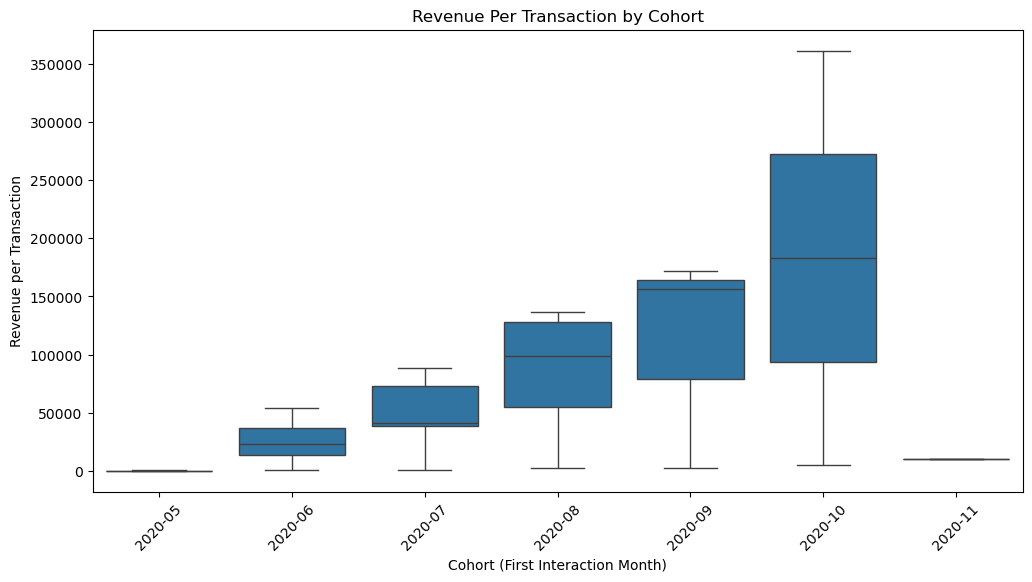

In [506]:
revenue_data = merged_df.groupby(['cohort', 'transaction_month'])['amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cohort', y='amount', data=revenue_data)
plt.title('Revenue Per Transaction by Cohort')
plt.xlabel('Cohort (First Interaction Month)')
plt.ylabel('Revenue per Transaction')
plt.xticks(rotation=45)
plt.show()

**Distribution: The box plot highlights the spread of revenue within each cohort. The cohorts have varying levels of skewness:
	•	Earlier cohorts (e.g., 2020-06) show a narrow distribution, meaning revenue was more consistent.
	•	Later cohorts (e.g., 2020-10) show a wide spread, indicating variability in transaction values.
	•	Outliers: The 2020-10 cohort displays  outliers, suggesting that a few transactions are contributing significantly to the total revenue.**

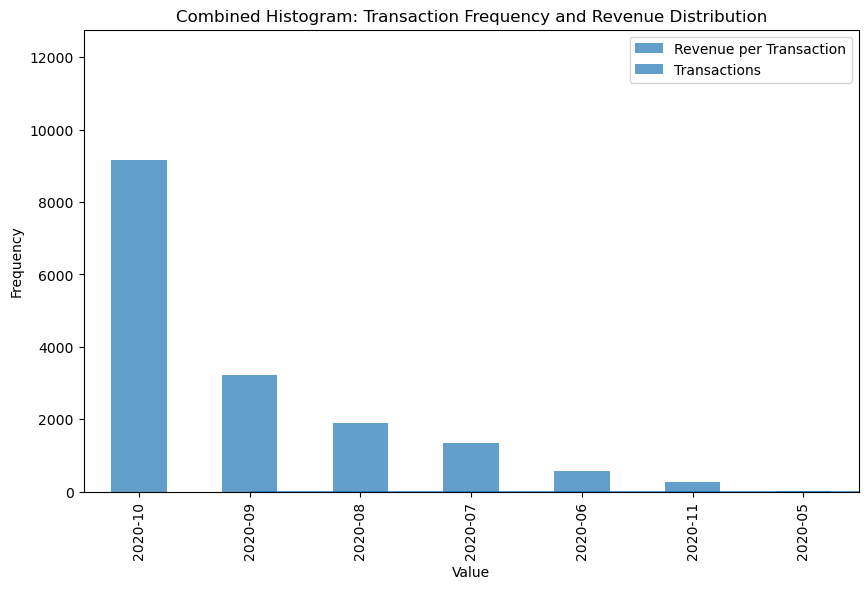

In [508]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
merged_df['transaction_month'].value_counts().plot(kind='bar', alpha=0.7, label='Transactions')

plt.hist(merged_df['amount'], bins=30, alpha=0.7, label='Revenue per Transaction')

plt.title('Combined Histogram: Transaction Frequency and Revenue Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 5. Cohort Analysis and deliveries:

Observations

**Dominance of the 2020-10 Cohort:**

- The 2020-10 cohort has the highest transaction frequency by far, with over 9,000 transactions. This aligns with previous analyses showing newer cohorts perform better.

- This could indicate a successful marketing campaign, increased onboarding efforts, or seasonal demand during this period.
    
**Decline in Transactions for Earlier Cohorts:**

- Older cohorts, such as 2020-06 and 2020-07, have significantly fewer transactions. This drop might be due to lower retention rates or reduced engagement over time.
    
**Revenue per Transaction Remains Consistent:**

- While transaction frequency fluctuates, the bars for revenue per transaction are fairly consistent across cohorts. This suggests that the average revenue per transaction does not depend heavily on cohort age.
    
**Outliers (2020-10):**
    
- The 2020-10 cohort not only has the most transactions but also displays a wider spread of revenue per transaction (as seen in earlier box plots). This could indicate diverse customer behavior, with both low- and high-value transactions occurring in this cohort.

**Questions**

**Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.**

The frequency of transactions generally decreases over time for earlier cohorts (e.g., 2020-06 and 2020-07). This suggests weaker long-term engagement or a natural drop-off in service usage. Newer cohorts (2020-09 and 2020-10) exhibit stronger engagement in their first and second months, with transaction counts significantly higher than earlier cohorts.
    
**Incident Rate: Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.**

Earlier cohorts (2020-06) have a higher incident rate, possibly due to operational inefficiencies or lack of proper user education in the early days of the service. Newer cohorts (2020-09 and 2020-10) show a lower incident rate, indicating improvements in processes or better customer targeting.
    
**Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.**

Later cohorts (2020-09 and 2020-10) generate significantly higher revenue compared to earlier ones. This indicates either higher transaction sizes or increased activity from high-value users. Revenue increases sharply for newer cohorts indicating better customer targeting.

**New Relevant Metric: Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.**

Would be necessary the implementation of the average revenue per user. This metric provides insight into the average revenue generated per active user within each cohort. 
Develop personalized offers or incentives for high-value users to sustain engagement and spending. 
Create retention strategies.